In [29]:
import json
import time
import numpy as np
import tqdm as tqdm
import operator
from operator import itemgetter
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import random

In [10]:
def timer(name):
    t0 = time.time()
    yield
    print(f'[{name}] done in {time.time() - t0:.0f} s')

In [1]:
def getAllAnswer(answers_list):
	"""
	Joins a list of answers by ";" to a single string
	
	Input:
		answer_list: list of answers (there are 10 answers for every question)

	Returns:
		A string in the format "ans1;ans2;...;ans10"
	"""
	answers = []
	for i in range(len(answers_list)):
		answers.append(answers_list[i]['answer'])
	return ';'.join(answers)

In [3]:
def process_question_annotation(subset):
    """
    Creates a JSON file whose elements are (image_path, question, answer, answers)
    from the Questions and Annotations files.

    Input:
      subset: subset can be "train2014" or "val2014"

    Returns:
      None
    """
    anno = json.load(open(f'D:/Final Project/Data Set/v2_mscoco_{subset}_annotations.json', 'r'))
    ques = json.load(open(f'D:/Final Project/Data Set/v2_OpenEnded_mscoco_{subset}_questions.json', 'r'))
    imdir='%s/COCO_%s_%012d.jpg' ## COCO_train2014_000000291417.jpg
    data = []

    for i in tqdm.tqdm(range(len(anno['annotations']))):
        image_path = imdir%(subset, subset, anno['annotations'][i]['image_id'])
        question = ques['questions'][i]['question']
        ans = anno['annotations'][i]['multiple_choice_answer']
        answer_list = getAllAnswer(anno['annotations'][i]['answers'])
        data.append({'img_path': image_path, 'question': question, 'ans': ans, 'answers': answer_list})

    json.dump(data, open(f'D:/Final Project/Data Set/vqa_raw_{subset}.json', 'w'))

In [33]:
def process(index, image_file, question, answer):
    image_folder = 'D:/Final Project/Data Set/'
    image = mpimg.imread(image_folder + image_file[index])
    plt.figure()
    plt.title(f'Q: {question[index]} \n A: {answer[index]}')
    plt.imshow(image)

In [17]:
subset = ['train2014', 'val2014']

for x in subset:
    process_question_annotation(x)

100%|██████████████████████████████████████████████████████████████████████| 214354/214354 [00:00<00:00, 289256.57it/s]


In [18]:
train_data = json.load(open(f'D:/Final Project/Data Set/vqa_raw_train2014.json', 'r'))
val_data = json.load(open(f'D:/Final Project/Data Set/vqa_raw_val2014.json', 'r'))

In [22]:
train_data[2]

{'img_path': 'train2014/COCO_train2014_000000458752.jpg',
 'question': 'What color is the players shirt?',
 'ans': 'orange',
 'answers': 'orange;orange;orange;orange;orange;orange;orange;orange;orange;orange'}

In [23]:
val_data[3]

{'img_path': 'val2014/COCO_val2014_000000393225.jpg',
 'question': 'What website copyrighted the picture?',
 'ans': 'foodiebakercom',
 'answers': 'foodiebakercom;foodiebakercom;foodiebaker;foodiebakercom;foodiebakercom;http://foodiebakercom;foodiebakercom;foodiebakercom;foodiebakercom;foodiebaker'}

In [26]:
ques = list(map(itemgetter('question'), train_data))
ans = list(map(itemgetter('ans'), train_data))
image_list = list(map(itemgetter('img_path'), train_data))

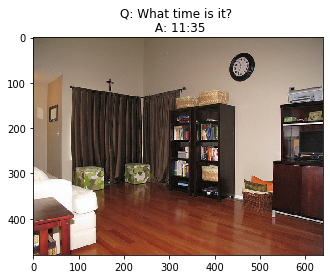

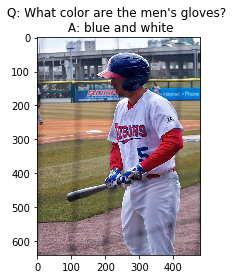

In [32]:
idx = random.sample(range(0, len(image_list)), 2)
for i in idx:
    process(i, image_list, ques, ans)